Part IV: Elastic Net Regularization using Gradient Descent
=======================================================


In [48]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

In [49]:
diamonds_df = pd.read_csv("diamonds_preprocessed.csv")
diamonds_df = diamonds_df.drop(columns='Unnamed: 0')
print('Dropping unrelated column \"Unnamed: 0\" since it is not required')
diamonds_df.info()

Dropping unrelated column "Unnamed: 0" since it is not required
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51334 entries, 0 to 51333
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   51334 non-null  float64
 1   table   51334 non-null  float64
 2   price   51334 non-null  float64
 3   x       51334 non-null  float64
 4   y       51334 non-null  float64
 5   z       51334 non-null  float64
dtypes: float64(6)
memory usage: 2.4 MB


In [50]:
X = diamonds_df[['carat', 'table', 'x', 'y', 'z']].values
y = diamonds_df['price'].values.reshape(-1, 1) 
N = X.shape[0] 
train_size = int(0.8 * N) 
index_number = np.arange(N)
np.random.shuffle(index_number)
train_indices = index_number[:train_size]
test_indices = index_number[train_size:]
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

X_train shape: (41067, 5)
y_train shape: (41067, 1)
X_test shape: (10267, 5)
y_test shape: (10267, 1)


In [51]:
def elastic_net_loss(X, y, w, lambda1, lambda2):
    N = len(y)
    predictions = X.dot(w)
    error = predictions - y
    mse_loss = (1 / (2 * N)) * np.sum(error ** 2)
    l2_penalty = (lambda1 / 2) * np.sum(w ** 2)
    l1_penalty = lambda2 * np.sum(np.abs(w))
    return mse_loss + l2_penalty + l1_penalty

def gradient_descent(X, y, w, lambda1, lambda2, alpha, epochs, threshold=None):
    loss_history = []
    N, d = X.shape
    for epoch in range(epochs):
        predictions = X.dot(w)
        error = predictions - y
        gradient = (1 / N) * X.T.dot(error) + lambda1 * w + lambda2 * np.sign(w)
        w -= alpha * gradient

        loss = elastic_net_loss(X, y, w, lambda1, lambda2)
        loss_history.append(loss)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

        if threshold is not None and np.all(np.abs(gradient) < threshold):
            print(f"Stopping early at iteration {epoch} due to small gradient.")
            break
    
    return w, loss_history

def random_initialization(input_dim, output_dim):
    return np.random.randn(input_dim, output_dim)

def zero_initialization(input_dim, output_dim):
    return np.zeros((input_dim, output_dim))

def xavier_initialization(input_dim, output_dim):
    limit = sqrt(6 / (input_dim + output_dim))
    return np.random.uniform(-limit, limit, size=(input_dim, output_dim))


def three_initialization_methods(X_train, y_train, lambda1, lambda2, alpha, epochs):
    input_dim, output_dim = X_train.shape[1], 1

    w_random = random_initialization(input_dim, output_dim)
    print("\nTraining with Random Initialization:")
    w_random= gradient_descent(X_train, y_train, w_random, lambda1, lambda2, alpha, epochs)

    w_zero = zero_initialization(input_dim, output_dim)
    print("\nTraining with Zero Initialization:")
    w_zero = gradient_descent(X_train, y_train, w_zero, lambda1, lambda2, alpha, epochs)

    w_xavier = xavier_initialization(input_dim, output_dim)
    print("\nTraining with Xavier Initialization:")
    w_xavier = gradient_descent(X_train, y_train, w_xavier, lambda1, lambda2, alpha, epochs)

    return w_random, w_zero, w_xavier

def plot_predictions(X_test, y_test, w):
    predictions = X_test.dot(w)
    plt.figure()
    plt.scatter(range(len(y_test)), y_test, label='Actual')
    plt.scatter(range(len(predictions)), predictions, label='Predicted', color='red')
    plt.title('Predictions vs Actual Values')
    plt.xlabel('Data points')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

def plot_loss_convergence(loss_history, stopping_criterion_name):
    plt.figure()
    plt.plot(range(len(loss_history)), loss_history)
    plt.title(f'Convergence Plot - {stopping_criterion_name}')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()

def experiment_with_stopping_criteria(X_train, y_train, X_test, y_test, lambda1, lambda2, alpha):
    input_dim, output_dim = X_train.shape[1], 1
    max_iterations = 100000  # Max iterations for threshold stopping criterion

    w = xavier_initialization(input_dim, output_dim)
    
    print("\nTraining with 10,000 iterations stopping criterion:")
    w_predefined, loss_predefined = gradient_descent(X_train, y_train, w, lambda1, lambda2, alpha, 10000)
    print("\nModel evaluation for predefined stopping criterion:")
    plot_predictions(X_test, y_test, w_predefined)
    plot_loss_convergence(loss_predefined, 'Predefined iterations (10,000)')
    
    w = xavier_initialization(input_dim, output_dim)
    
    print("\nTraining with gradient threshold stopping criterion:")
    w_grad_threshold, loss_grad_threshold = gradient_descent(X_train, y_train, w, lambda1, lambda2, alpha, max_iterations, threshold=0.01)
    print("\nModel evaluation for gradient threshold stopping criterion:")
    plot_predictions(X_test, y_test, w_grad_threshold)
    plot_loss_convergence(loss_grad_threshold, 'Gradient threshold (0.01)')

    return w_predefined, w_grad_threshold

In [52]:
lambda1 = 0.1  # L2 regularization parameter
lambda2 = 0.1  # L1 regularization parameter
alpha = 0.01
epochs = 1000

w_random, w_zero, w_xavier = three_initialization_methods(X_train, y_train, lambda1, lambda2, alpha, epochs)


Training with Random Initialization:
Epoch 0, Loss: 3.2408536190323907


Epoch 100, Loss: 0.9574188412039009
Epoch 200, Loss: 0.5420178937799918
Epoch 300, Loss: 0.3462813515927123
Epoch 400, Loss: 0.22587911934664315
Epoch 500, Loss: 0.15426940510648707
Epoch 600, Loss: 0.10340668892006896
Epoch 700, Loss: 0.07252532580226292
Epoch 800, Loss: 0.06362954033076129
Epoch 900, Loss: 0.05931041471526427

Training with Zero Initialization:
Epoch 0, Loss: 0.05582553795114699
Epoch 100, Loss: 0.05416282650781656
Epoch 200, Loss: 0.0537438766118184
Epoch 300, Loss: 0.05352488066705283
Epoch 400, Loss: 0.053383662753718863
Epoch 500, Loss: 0.05327994555194966
Epoch 600, Loss: 0.05321436651026474
Epoch 700, Loss: 0.053168677378956745
Epoch 800, Loss: 0.05311459928463114
Epoch 900, Loss: 0.053094327516738114

Training with Xavier Initialization:
Epoch 0, Loss: 0.5704437429021958
Epoch 100, Loss: 0.3991382183000913
Epoch 200, Loss: 0.2779392805479376
Epoch 300, Loss: 0.18629952053132665
Epoch 400, Loss: 0.11640483730483325
Epoch 500, Loss: 0.06796187334210319
Epoch 600


Training with 10,000 iterations stopping criterion:
Epoch 0, Loss: 0.20303284786319997
Epoch 100, Loss: 0.12459498991150178
Epoch 200, Loss: 0.07957678322176541
Epoch 300, Loss: 0.06395909601575656
Epoch 400, Loss: 0.059174298739271755
Epoch 500, Loss: 0.05709770740738546
Epoch 600, Loss: 0.05617180502782683
Epoch 700, Loss: 0.05550985517365142
Epoch 800, Loss: 0.05501326171873268
Epoch 900, Loss: 0.054614564426610696
Epoch 1000, Loss: 0.05431162982589707
Epoch 1100, Loss: 0.0540657779269573
Epoch 1200, Loss: 0.05385244116590576
Epoch 1300, Loss: 0.053694961826564996
Epoch 1400, Loss: 0.05355895503386304
Epoch 1500, Loss: 0.0534416451369917
Epoch 1600, Loss: 0.05337014845667737
Epoch 1700, Loss: 0.05328999891378652
Epoch 1800, Loss: 0.053231323311242015
Epoch 1900, Loss: 0.053179251913841985
Epoch 2000, Loss: 0.05315364685501237
Epoch 2100, Loss: 0.053122466235538554
Epoch 2200, Loss: 0.0530877907202882
Epoch 2300, Loss: 0.05306644994774829
Epoch 2400, Loss: 0.053073349402147696
Epoch

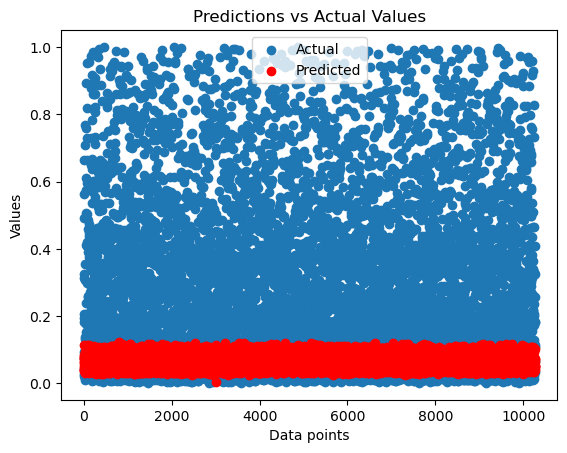

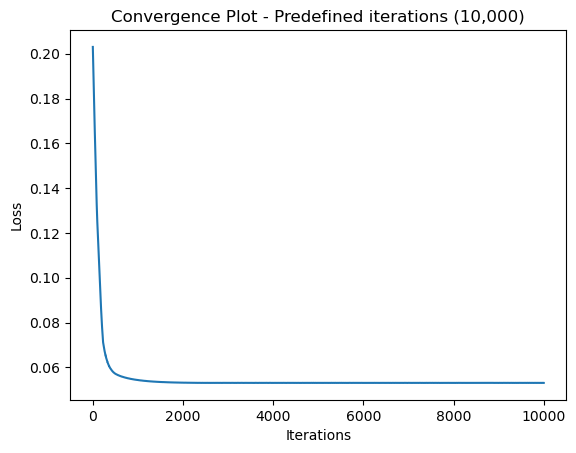


Training with gradient threshold stopping criterion:
Epoch 0, Loss: 0.6283262796325508
Epoch 100, Loss: 0.2752468582308641
Epoch 200, Loss: 0.1596525303940307
Epoch 300, Loss: 0.11179275414681161
Epoch 400, Loss: 0.08096290156544797
Epoch 500, Loss: 0.06996510227983074
Epoch 600, Loss: 0.06362947133929514
Epoch 700, Loss: 0.059983814542179804
Epoch 800, Loss: 0.05788589401188333
Epoch 900, Loss: 0.05667170803580626
Epoch 1000, Loss: 0.0558529457475779
Epoch 1100, Loss: 0.05528595778874029
Epoch 1200, Loss: 0.05484509106187378
Epoch 1300, Loss: 0.054488082019786915
Epoch 1400, Loss: 0.054195630672414515
Epoch 1500, Loss: 0.05396405857523179
Epoch 1600, Loss: 0.05378011334467333
Stopping early at iteration 1617 due to small gradient.

Model evaluation for gradient threshold stopping criterion:


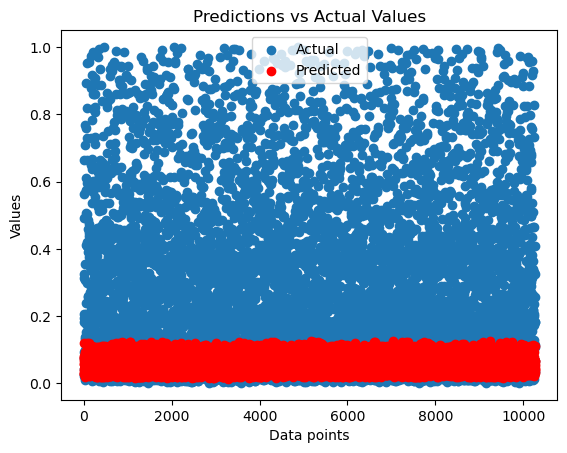

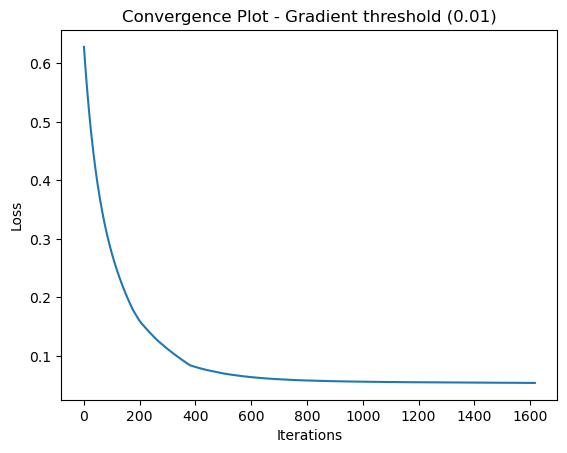

In [53]:
w_predefined, w_grad_threshold = experiment_with_stopping_criteria(X_train, y_train, X_test, y_test, lambda1, lambda2, alpha)